# **Exploratory Data Analysis**

Descriptions:
1. Perform standard data cleansing
     - Missing values
     - Duplicated values
2. Perform standard EDA with rich interpretations
    - Statistical summary of columns
    - Univariate analysis
    - Multivariate analysis
3. Perform deep-dive exploration
    - Ask minimum 2 questions
    - At least 1 of them should involve group-by aggregation!

### **Libraries**

In [233]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### **Dataset**

In [234]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [235]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [236]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Standard Data Cleansing**

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [238]:
df.duplicated().sum()

0

In [239]:
# Make sure all numerical data are in numeric format
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")

In [240]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [241]:
df.isnull().sum() * 100 / len(df)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [242]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [243]:
# Unique values in columns
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
[df[i].unique().tolist() for i in df[cols]]

[['Female', 'Male'],
 [0, 1],
 ['Yes', 'No'],
 ['No', 'Yes'],
 ['No', 'Yes'],
 ['No phone service', 'No', 'Yes'],
 ['No', 'Yes', 'No internet service'],
 ['Yes', 'No', 'No internet service'],
 ['No', 'Yes', 'No internet service'],
 ['No', 'Yes', 'No internet service'],
 ['No', 'Yes', 'No internet service'],
 ['No', 'Yes', 'No internet service'],
 ['Yes', 'No'],
 ['No', 'Yes']]

In [244]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0 : 'No', 1 : 'Yes'})
df[cols] = df[cols].astype(str)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Observation**

1. Data contained 7043 rows and 21 columns
2. After converted to float, column 'TotalCharges' have 11 missing values
3. Rows with missing values are dropped, now data contains 7032 rows and 21 columns
4. No duplicated rows
5. There are many categorical data that can be converted into numeric data such as gender (male-female) and Yes-No data

# **Standard EDA**

## **Statistical Summary**

In [246]:
num = ['tenure', 'MonthlyCharges', 'TotalCharges'] # numerical data
cat = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'PaperlessBilling', 'Churn']

In [247]:
df[num].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [248]:
df[cat].describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,PaperlessBilling,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,4,2,2
top,7590-VHVEG,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,Yes,No
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,2365,4168,5163


In [249]:
df_cat = df[cat].drop(['customerID'], axis = 1)
for col in df_cat:
    print(f"Value counts of {col} column")
    a = df_cat[col].value_counts()
    print(a, '\n')

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of SeniorCitizen column
No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64 

Value counts of OnlineBackup column
No                     3087
Yes                    2425
No inte

## **Univariate Analysis**

### **Detect Outlier with Boxplot**

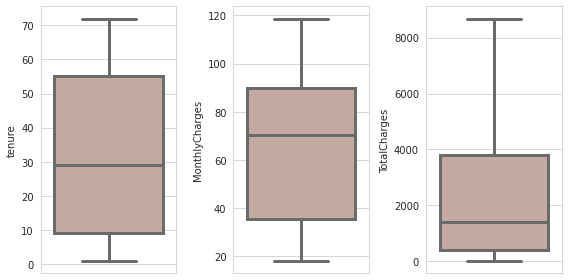

In [250]:
#plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1,3, figsize=(8, 4))

features = num
sns.set_style("whitegrid")
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color = 'darksalmon', saturation = 0.3, linewidth = 3)
    plt.tight_layout()

**Observation**

1. Boxplot for each variable shows the range of the data and overall distribution
2. None of the numerical data has outlier
3. Data 'tenure' is positively skewed, mean > median
4. Data 'MonthlyCharges' is negatively skewed, mean < median
5. Data 'TotalCharges' is positively skewed, mean > median

### **Distribution**

Categorical Data Distribution

In [251]:
def data_visual_column(column):
    d= pd.DataFrame(df.groupby(column).mean()).reset_index()
    fig , axes = plt.subplots(1,2, figsize=(25,5))
    axes[0].pie(df[column].value_counts(sort=False), labels = df[column].unique(), autopct='%.00f%%')
    sns.countplot(ax= axes[1], data = df, x= column)
    axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 30)
    fig.suptitle(f'Visualization of Categorical "{column}"')

In [252]:
cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'PaperlessBilling', 'Churn']

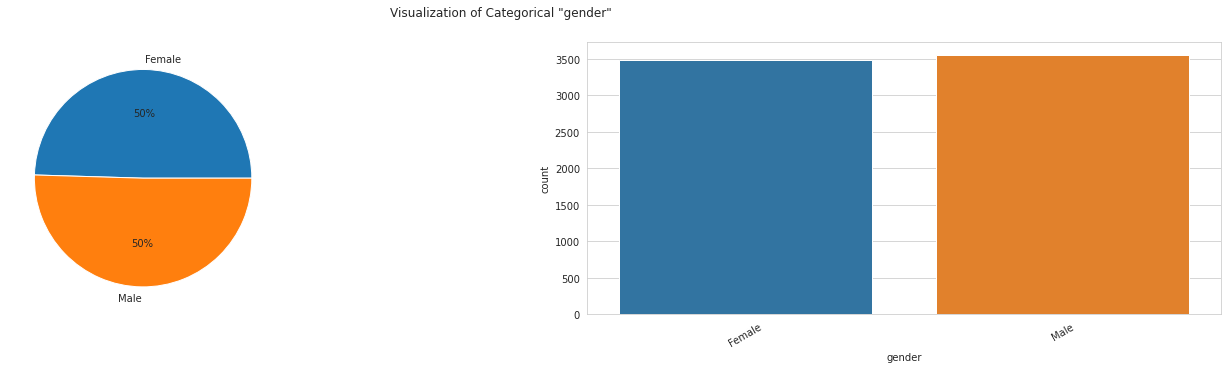

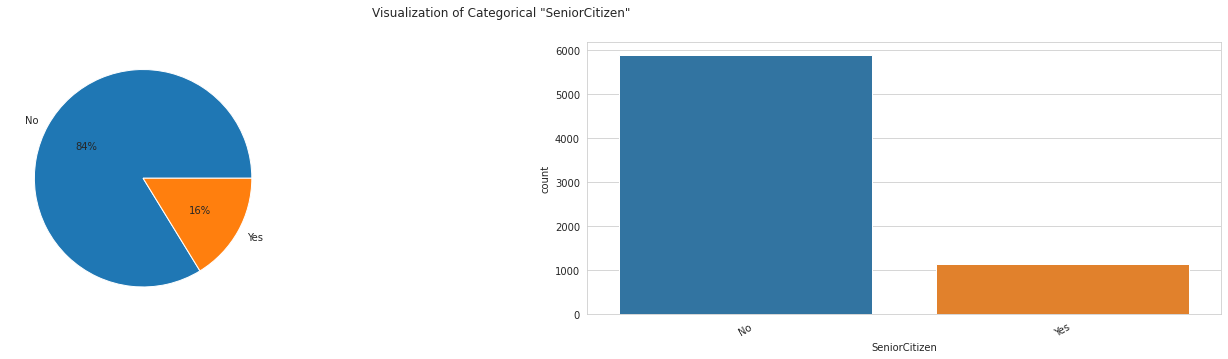

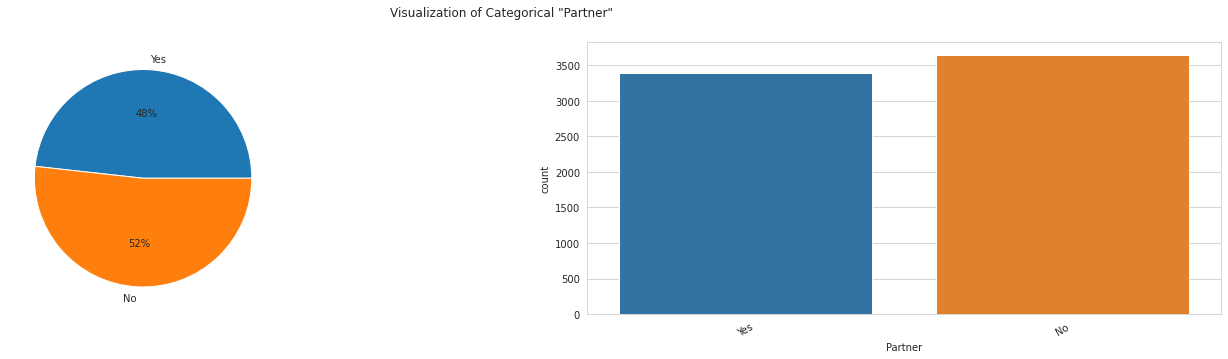

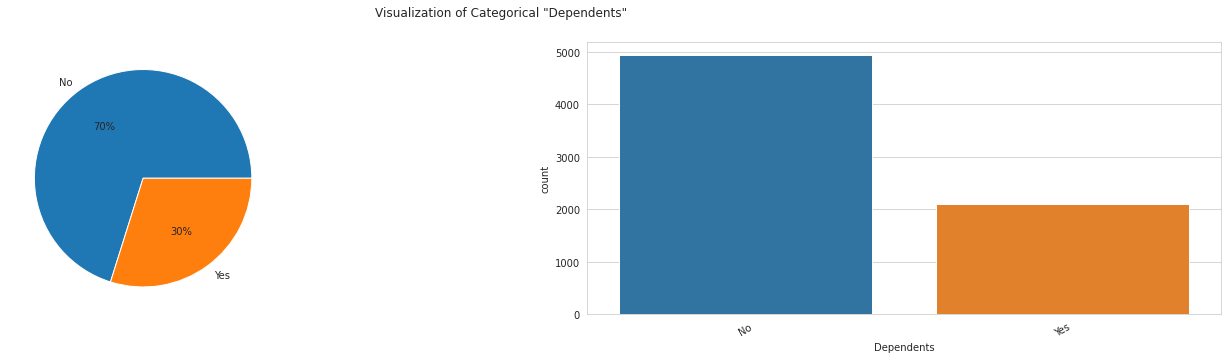

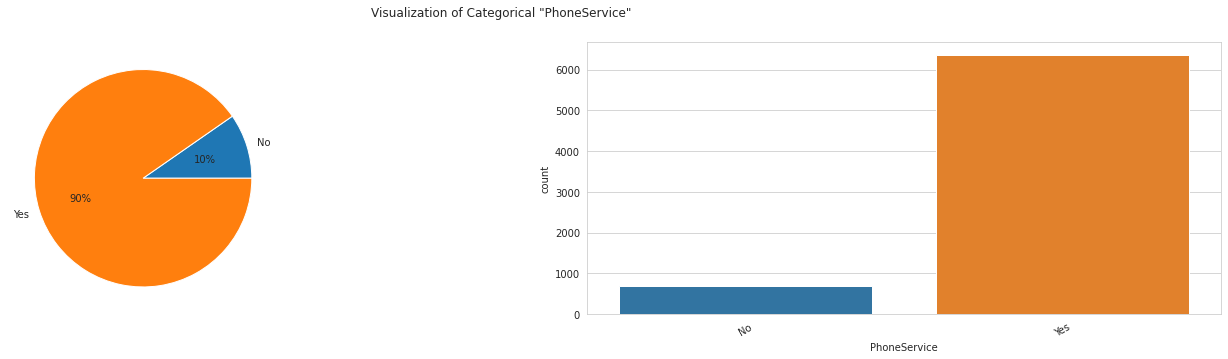

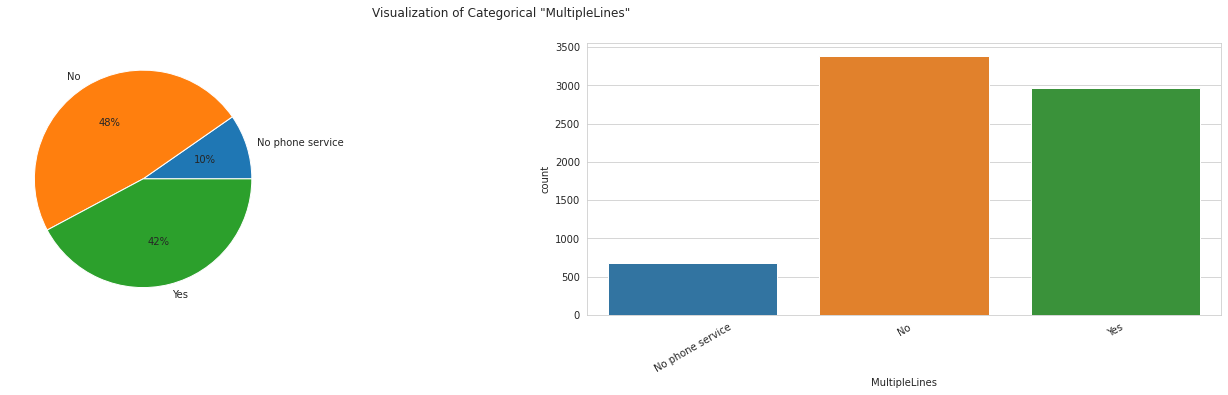

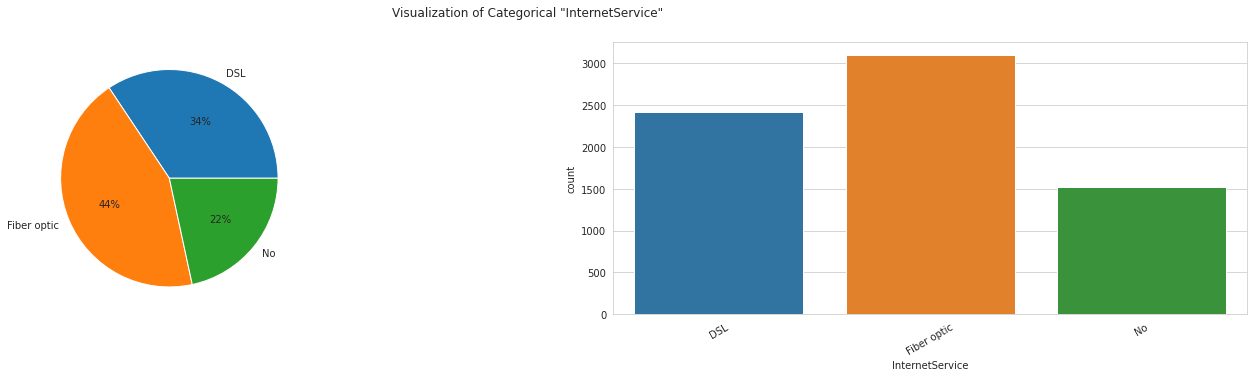

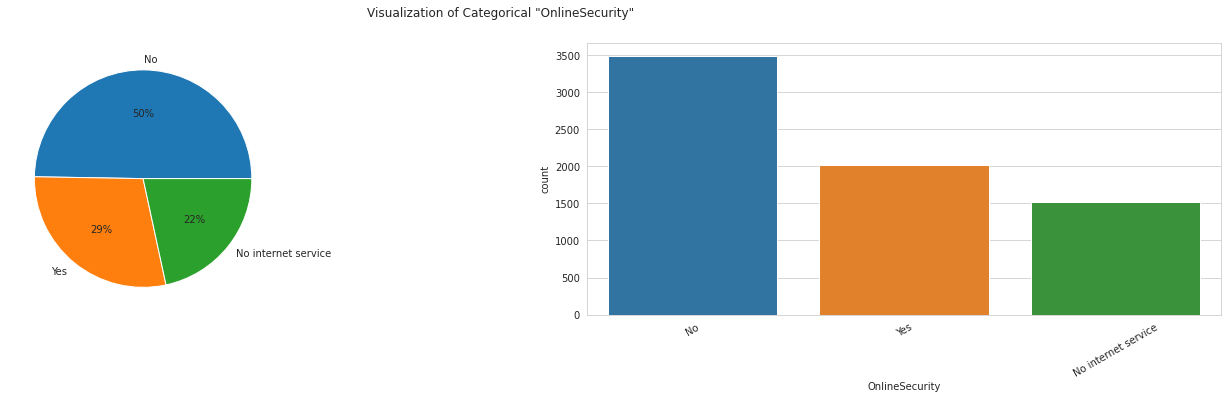

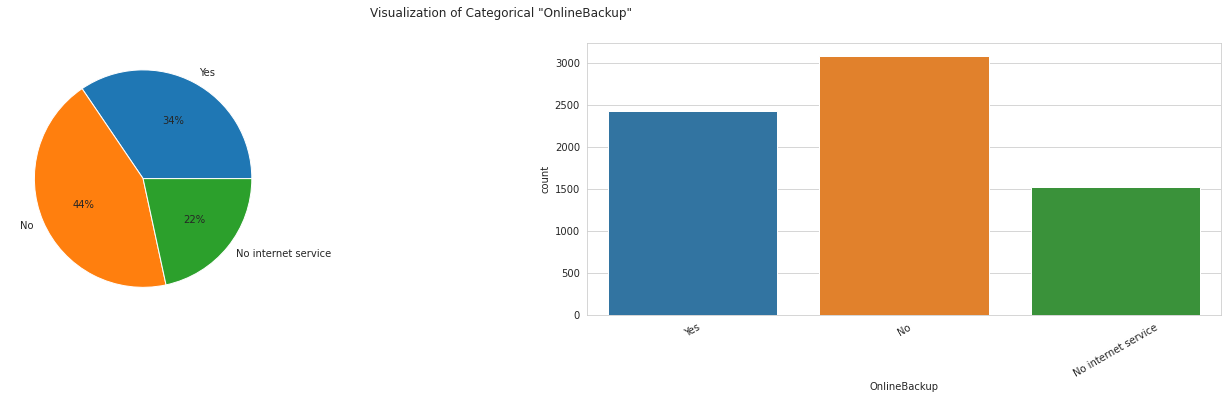

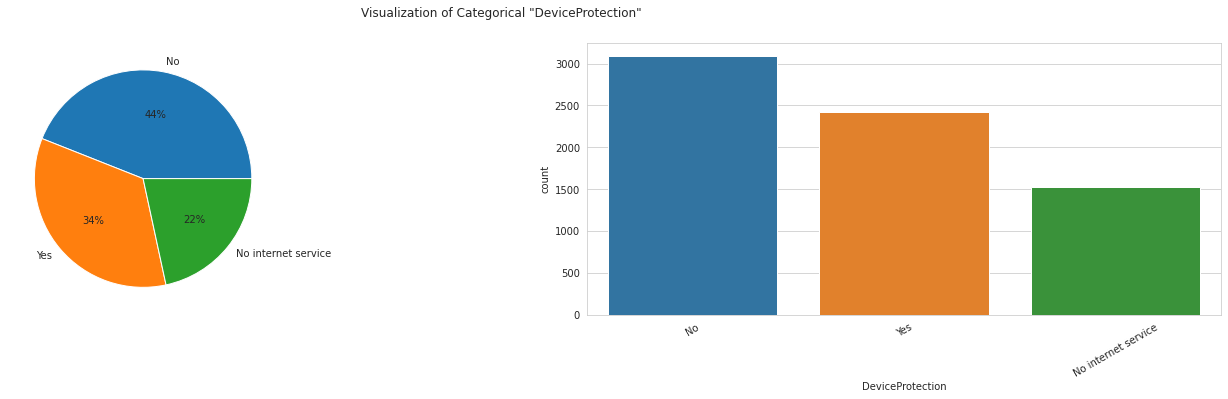

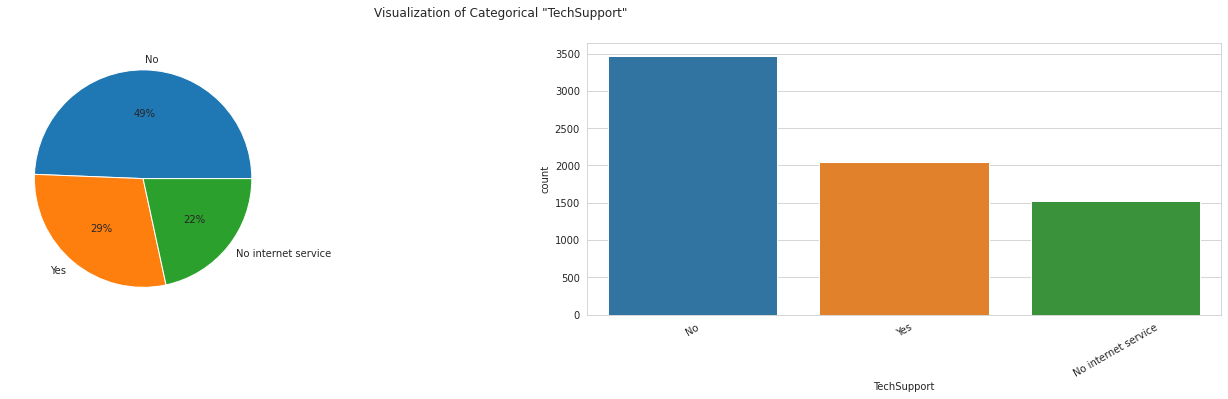

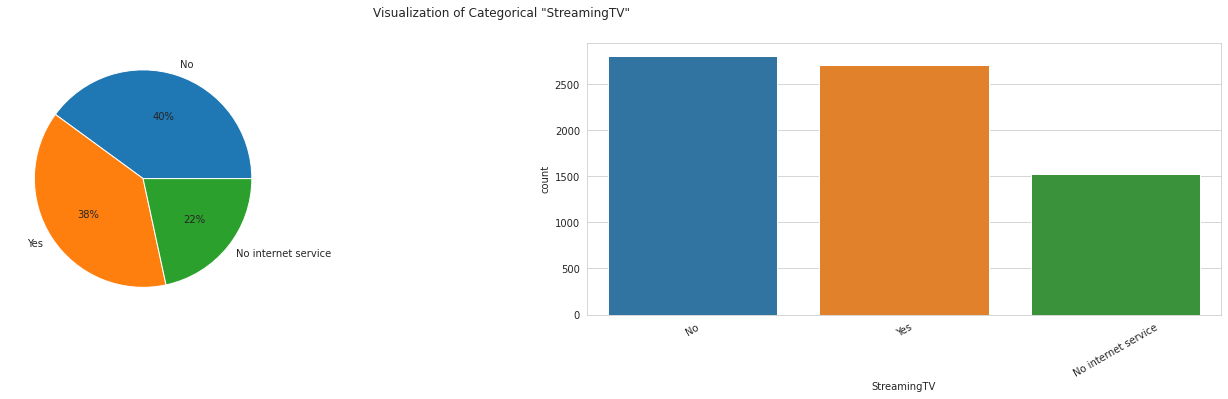

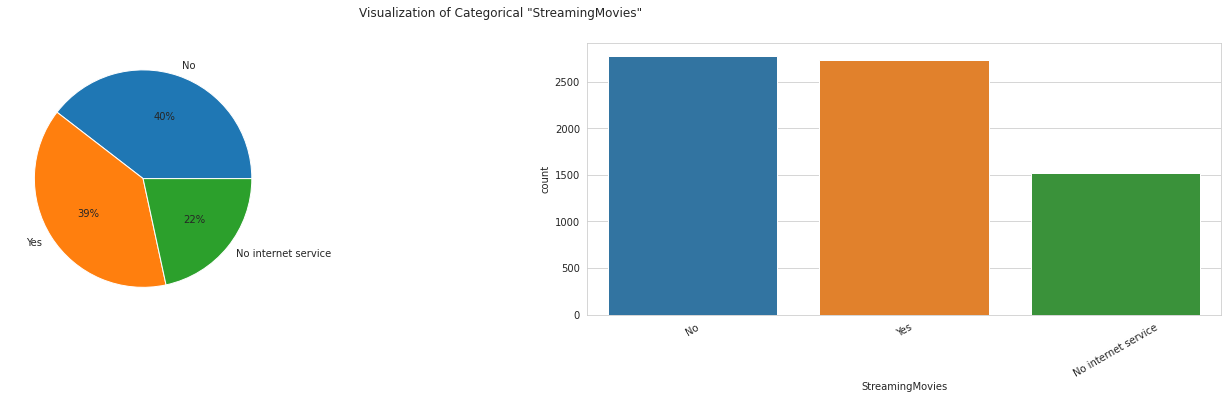

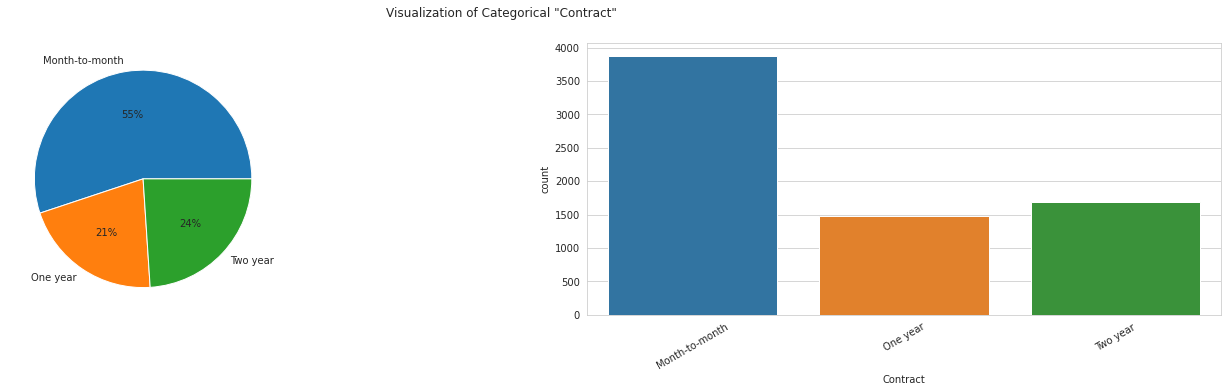

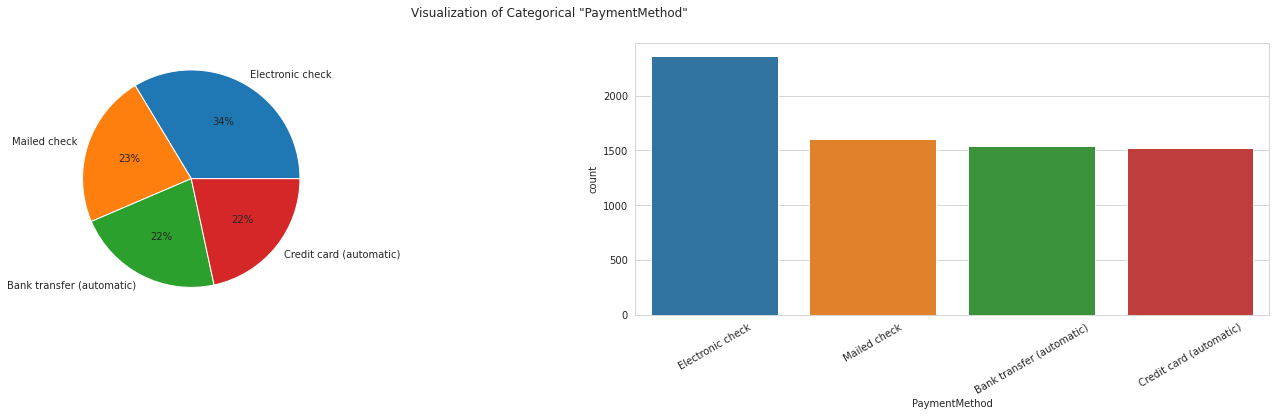

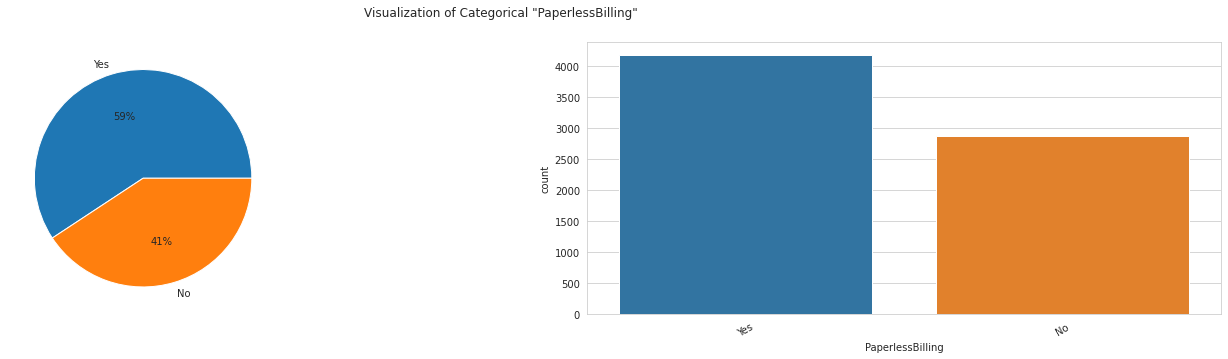

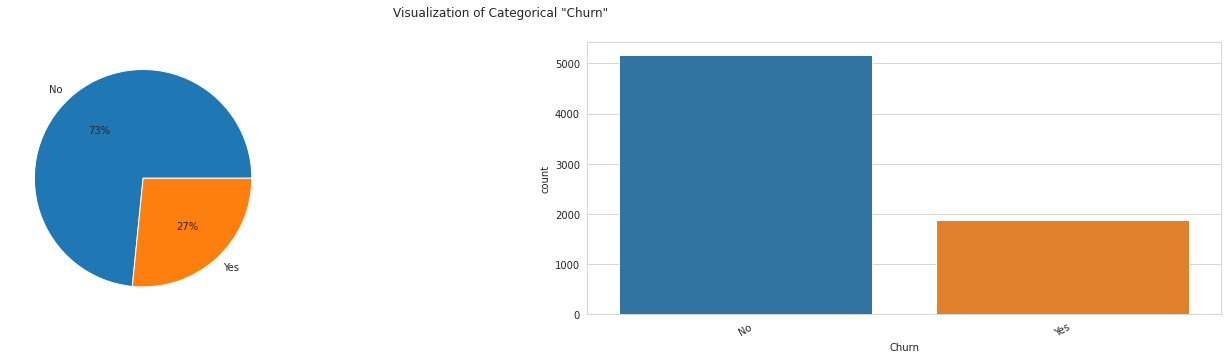

In [253]:
for columns in cat:
    if(len(pd.unique(df[columns]))<10):
      data_visual_column(columns)

**Observation**

1. Customers in the data are balanced between male and female also between customer with and without partner.
2. The sample is dominated by non-senior citizen.
3. Most customers do not have any dependent.
4. As many as 90% customers have phone service, 48% of them not having multiple lines and 42% having multiple lines.
5. Most users have access to internet service, dominated by Fiber Optic then DSL. Even when they have access to it, most still do not have Online Security, Online Backup, Device Protection, and Tech Support. For their access to streaming services seem balanced.
6. As many as 55% customers have month-to-month contract.
7. Most customers for 34% pays with electronic check, the rest use mailed check, auto bank transfer, and auto credit card payment. Most get paperless billing.
8. From the customers data, as many as 27% users have churned.

### **Numerical Data Distribution using KDE**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



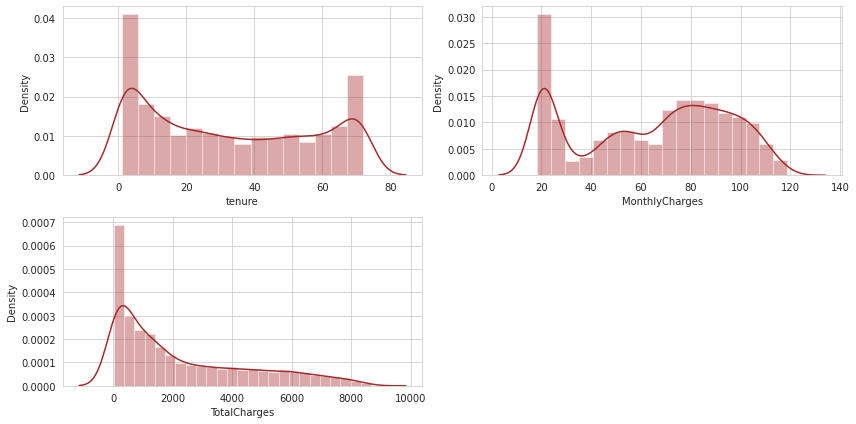

In [254]:
plt.figure(figsize=(12,6))

for i in range(0, len(num)):
    plt.subplot(2, len(num)//2 + 1, i+1)
    #plt.subplot(1, len(num), i+1)
    sns.distplot(x=df[num[i]], color='brown')
    plt.xlabel(num[i])
    plt.tight_layout()

**Observation**

1. All the numeric data are skewed
2. Data TotalCharges shows less count for higher charge value
3. Data MonthlyCharges is not symmetrical

## **Multivariate Analysis**

In [255]:
df2 = df.drop(columns = 'customerID')
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [256]:
# To make the multivariate analysis easier, convert the categorical data to numerical
group1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
group2 = ['InternetService', 'Contract', 'PaymentMethod']

**One Hot Encoding**

In [257]:
df2[group1] = df2[group1].replace({'Female' : 1, 'Male' : 0, 'Yes': 1 ,'No': 0, 'No internet service' : -1, 'No phone service' : -1 })
df2[group1] = df2[group1].astype(float)

**Mean Encoding**

In [258]:
for col in df[group2]:
  mean = df2['TotalCharges'].mean()
  count = df2['TotalCharges'].count()
  agg = df2.groupby(col)['TotalCharges'].agg(['count','mean'])
  counts = agg['count']
  means = agg['mean']
  weight = 100
  smooth = (counts * means + weight * mean) / (counts + weight)
  print(smooth, '\n')
  df2.loc[:, col] = df2[col].map(smooth)

InternetService
DSL            2126.288114
Fiber optic    3176.455881
No              765.101817
dtype: float64 

Contract
Month-to-month    1392.249445
One year          2986.885206
Two year          3647.946075
dtype: float64 

PaymentMethod
Bank transfer (automatic)    3030.822134
Credit card (automatic)      3022.778158
Electronic check             2098.674764
Mailed check                 1126.597561
dtype: float64 



In [259]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,1.0,0.0,1,0.0,-1.0,2126.288114,0.0,1.0,0.0,0.0,0.0,0.0,1392.249445,1.0,2098.674764,29.85,29.85,0.0
1,0.0,0.0,0.0,0.0,34,1.0,0.0,2126.288114,1.0,0.0,1.0,0.0,0.0,0.0,2986.885206,0.0,1126.597561,56.95,1889.50,0.0
2,0.0,0.0,0.0,0.0,2,1.0,0.0,2126.288114,1.0,1.0,0.0,0.0,0.0,0.0,1392.249445,1.0,1126.597561,53.85,108.15,1.0
3,0.0,0.0,0.0,0.0,45,0.0,-1.0,2126.288114,1.0,0.0,1.0,1.0,0.0,0.0,2986.885206,0.0,3030.822134,42.30,1840.75,0.0
4,1.0,0.0,0.0,0.0,2,1.0,0.0,3176.455881,0.0,0.0,0.0,0.0,0.0,0.0,1392.249445,1.0,2098.674764,70.70,151.65,1.0


### **Correlation Map**

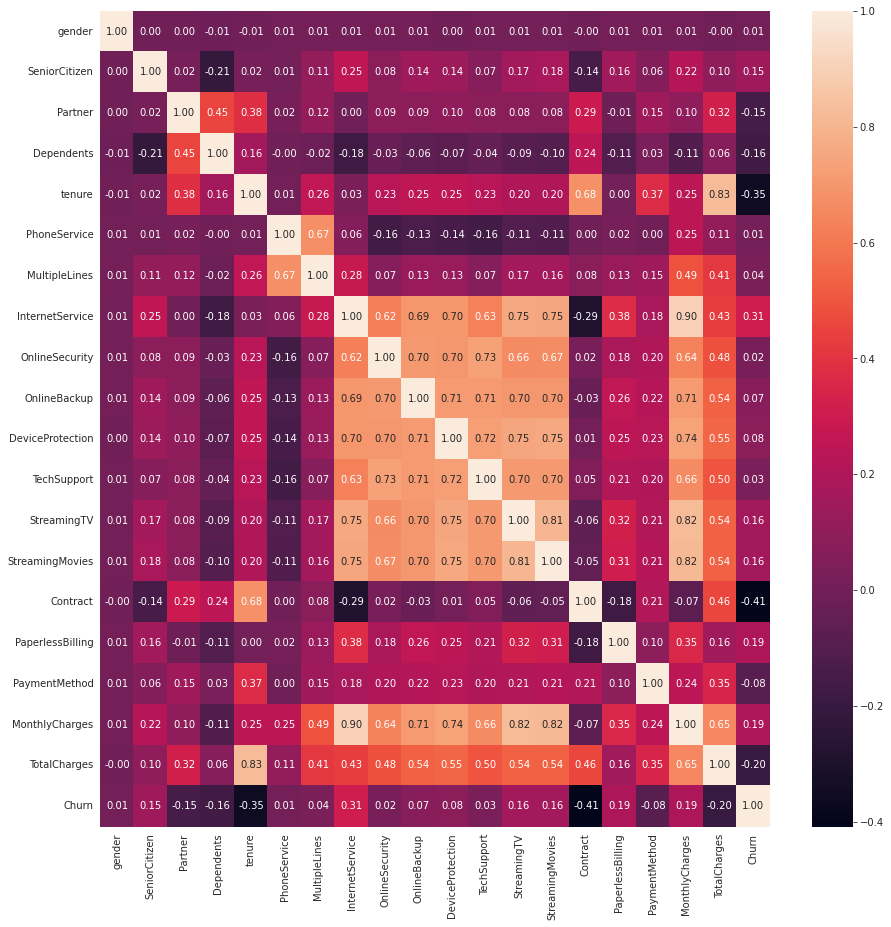

In [260]:
correlation = df2.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(correlation, annot=True, fmt='.2f')

**Observation**

1. InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, and MonthlyCharges are highly correlated with each other
2. There is no column that is highly correlated with churning, but InternetService data and Contract are possibly having connection with churning

### **How InternetService and Contract affects Churning Status**

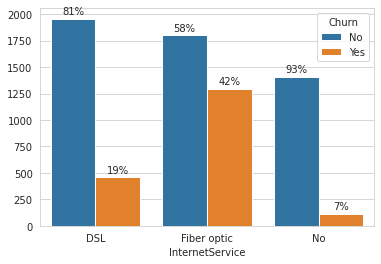

In [261]:
ax = sns.countplot( x = 'InternetService', data=df, hue="Churn")
ax.set_ylabel('')

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

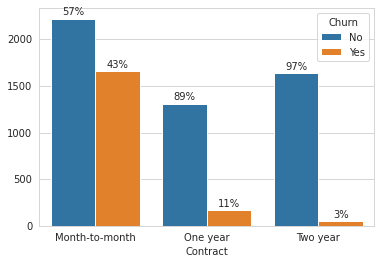

In [262]:
ax = sns.countplot( x = 'Contract', data=df, hue="Churn")
ax.set_ylabel('')

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

## **Conclusion**

1. There is no problem with the data, no missing value and no duplicated row

2. To make statistical summary easier, SeniorCitizen data is converted to Yes-No value

3. There is no outlier detected with boxplot

4. Numerical datas are skewed and non-symetrical

5. For easier multivariate analysis, all categorical data are encoded into numerical value

6. From the countplot for observing 'Churn' in different types of 'InternetService' and 'Contract', it shows that churning rate is higher for customers who use fiber optic and having month-to-month contract

# **Deep-Dive Exploration**

## **EDA Questions**

1. Which payment method is mostly used? Which one has the highest total transaction value?

2. Does senior citizen churn more than non-senior citizen? How is the gender demographic?

3. Does churning happen because of high charges?

4. Which variable has the highest effect (importance) on customer churning?

5. How is churning for customers with/without internet service? Which one has the highest churning? Are additional facilities like 'OnlineProtection' for users with internet service affecting the churning frequency?

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### **1. Most Used Payment Method and Highest Transaction Value**

In [264]:
payment_Method = (df.groupby(['PaymentMethod']).agg(total_Transaction=('TotalCharges','count')).sort_values(by = ['total_Transaction'], ascending=False).reset_index())
payment_Method.head()

,PaymentMethod,total_Transaction
0,Electronic check,2365
1,Mailed check,1604
2,Bank transfer (automatic),1542
3,Credit card (automatic),1521


In [265]:
payment_Value = (df.groupby(['PaymentMethod']).agg(total_Value=('TotalCharges','sum')).sort_values(by = ['total_Value'], ascending=False).reset_index())
payment_Value.head()

,PaymentMethod,total_Value
0,Electronic check,4944903.25
1,Bank transfer (automatic),4748279.90
2,Credit card (automatic),4671593.35
3,Mailed check,1691392.20


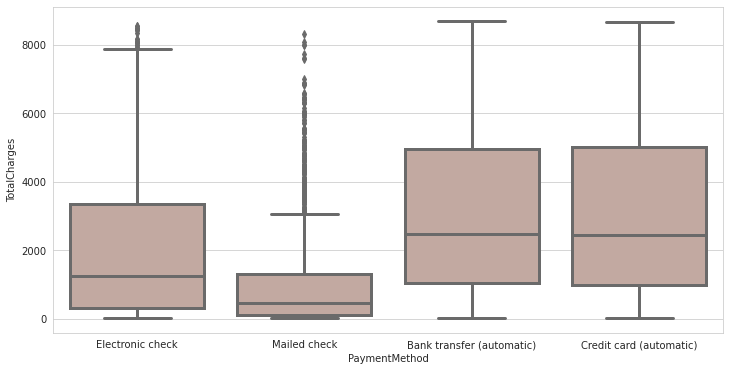

In [266]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'PaymentMethod', y = 'TotalCharges', data = df, color = 'darksalmon', saturation = 0.3, linewidth = 3)

**Observation**

1. Electronic check is the most used payment method and the highest transaction value
2. Mailed check is the second most used payment method but the lowest total transaction value with only one fourth the value for all other checks
3. Can be assumed that mailed check is a favorite payment method for customers with low charges

### **2. Senior Citizenship and Gender on Churning**

In [267]:
df3 = df
df3['SeniorCitizen'] = df3['SeniorCitizen'].replace({'Yes' : 'Senior Citizen', 'No' : 'Non-Senior Citizen'})
df3['Churn'] = df3['Churn'].replace({'Yes' : 'Churned', 'No' : 'Still Active'})

In [268]:
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Non-Senior Citizen,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Still Active
1,5575-GNVDE,Male,Non-Senior Citizen,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Still Active
2,3668-QPYBK,Male,Non-Senior Citizen,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,7795-CFOCW,Male,Non-Senior Citizen,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Still Active
4,9237-HQITU,Female,Non-Senior Citizen,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


In [269]:
senior = (df3.groupby(['SeniorCitizen', 'gender', 'Churn']).agg(total=('Churn','count')).sort_values(by = ['total'], ascending=False).reset_index())
senior

,SeniorCitizen,gender,Churn,total
0,Non-Senior Citizen,Male,Still Active,2281
1,Non-Senior Citizen,Female,Still Active,2216
2,Non-Senior Citizen,Female,Churned,699
3,Non-Senior Citizen,Male,Churned,694
4,Senior Citizen,Male,Still Active,338
5,Senior Citizen,Female,Still Active,328
6,Senior Citizen,Female,Churned,240
7,Senior Citizen,Male,Churned,236


In [270]:
senior['Percentage (%)'] = senior['total'] / 7032 * 100
senior

,SeniorCitizen,gender,Churn,total,Percentage (%)
0,Non-Senior Citizen,Male,Still Active,2281,32.437429
1,Non-Senior Citizen,Female,Still Active,2216,31.513083
2,Non-Senior Citizen,Female,Churned,699,9.940273
3,Non-Senior Citizen,Male,Churned,694,9.869170
4,Senior Citizen,Male,Still Active,338,4.806598
5,Senior Citizen,Female,Still Active,328,4.664391
6,Senior Citizen,Female,Churned,240,3.412969
7,Senior Citizen,Male,Churned,236,3.356086


In [271]:
fig = px.sunburst(senior, path=['Churn','SeniorCitizen', 'gender'], values='total', color='SeniorCitizen')
fig.update_layout(title={'text': "Churning Distribution on Senior Citizenship Status and Gender"})
fig.show()

In [272]:
senior.drop(senior[senior['Churn'] == 'Still Active'].index, inplace = True)
sumz = senior['total'].sum()
senior['Percentage (%)'] = senior['total'] / sumz * 100
senior

,SeniorCitizen,gender,Churn,total,Percentage (%)
2,Non-Senior Citizen,Female,Churned,699,37.399679
3,Non-Senior Citizen,Male,Churned,694,37.132156
6,Senior Citizen,Female,Churned,240,12.841091
7,Senior Citizen,Male,Churned,236,12.627073


**Observation**

1. Customers who churned are dominated by non-senior citizen
2. Gender distribution on customers who churned is balanced between male and female

### **3. Churning and Total Charges**

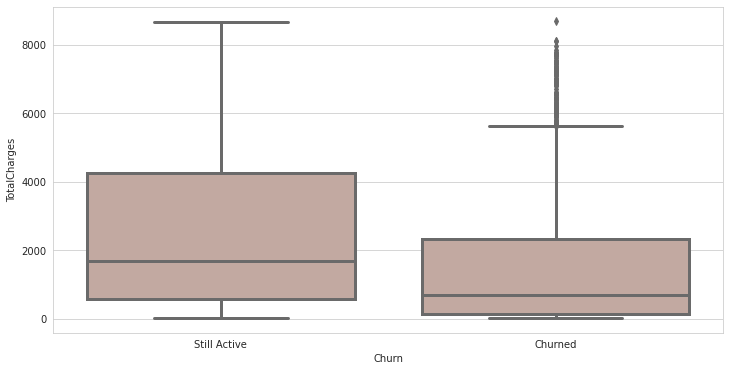

In [273]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Churn', y = 'TotalCharges', data = df, color = 'darksalmon', saturation = 0.3, linewidth = 3)

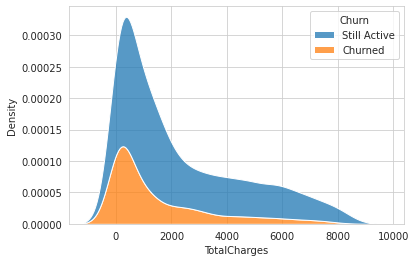

In [274]:
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", multiple="stack")

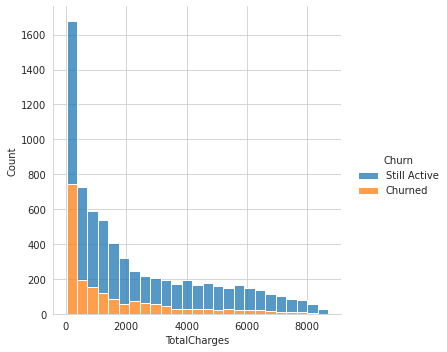

In [275]:
sns.displot(data=df, x="TotalCharges", hue="Churn", multiple="stack")

In [276]:
charge = (df3.groupby(['Churn']).agg(ChargeMean=('TotalCharges','mean'), MaxCharge=('TotalCharges','max'), MinCharge=('TotalCharges','min')).sort_values(by = ['ChargeMean'], ascending=False).reset_index())
charge

,Churn,ChargeMean,MaxCharge,MinCharge
0,Still Active,2555.344141,8672.45,18.80
1,Churned,1531.796094,8684.80,18.85


**Observation**

It does not look like that high TotalCharge directly causes churning

### **4. Feature Importance on Churn Data**

In [277]:
def compute_mutual_information(categorical_serie):
    from sklearn.metrics import mutual_info_score
    return mutual_info_score(categorical_serie, df.Churn)

# select categorial variables excluding the response variable 
categorical_variables = df.select_dtypes(include=object).drop(['customerID', 'Churn'], axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
SeniorCitizen       0.010533
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


Text(0.5, 0, 'Features')

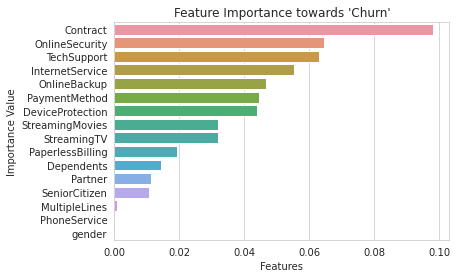

In [278]:
#plt.figure(figsize=(20,8))
sns.barplot(x=feature_importance.values, y= feature_importance.index);
#plt.plot(feature_importance)
plt.title("Feature Importance towards 'Churn'")
plt.ylabel("Importance Value")
plt.xlabel("Features")

**Observation**

1. 'Contract' feature have largest effect towards 'Churn'
2. 'Churn' also highly affected by internet service-related features such as 'OnlineSecurity', 'TechSupport', 'InternetService', 'OnlineBackup'

### **5. Internet Service and its Facilities on Churning**

In [279]:
df4 = df
df4['InternetService'] = df4['InternetService'].replace({'No' : 'No Internet Service'})
df4['OnlineSecurity'] = df4['OnlineSecurity'].replace({'Yes' : 'Have Online Security', 'No' : 'No Online Security'})
df4['Churn'] = df3['Churn'].replace({'Yes' : 'Churned', 'No' : 'Still Active'})

In [280]:
internet = (df4.groupby(['InternetService', 'Churn']).agg(total=('Churn','count')).sort_values(by = ['total'], ascending=False).reset_index())
sumz = internet['total'].sum()
internet['Percentage (%)'] = internet['total'] / sumz * 100
internet

,InternetService,Churn,total,Percentage (%)
0,DSL,Still Active,1957,27.829920
1,Fiber optic,Still Active,1799,25.583049
2,No Internet Service,Still Active,1407,20.008532
3,Fiber optic,Churned,1297,18.444255
4,DSL,Churned,459,6.527304
5,No Internet Service,Churned,113,1.606940


In [281]:
fig = px.sunburst(internet, path=['Churn', 'InternetService'], values='total', color='InternetService')
fig.update_layout(title={'text': "Churning Distribution on Internet Service Type"})
fig.show()

In [282]:
security = (df4.groupby(['InternetService', 'OnlineSecurity', 'Churn']).agg(total=('Churn','count')).sort_values(by = ['total'], ascending=False).reset_index())
sumz = security['total'].sum()
security['Percentage (%)'] = internet['total'] / sumz * 100
security

,InternetService,OnlineSecurity,Churn,total,Percentage (%)
0,No Internet Service,No internet service,Still Active,1407,27.829920
1,Fiber optic,No Online Security,Still Active,1143,25.583049
2,Fiber optic,No Online Security,Churned,1114,20.008532
3,DSL,Have Online Security,Still Active,1064,18.444255
4,DSL,No Online Security,Still Active,893,6.527304
5,Fiber optic,Have Online Security,Still Active,656,1.606940
6,DSL,No Online Security,Churned,347,NaN
7,Fiber optic,Have Online Security,Churned,183,NaN
8,No Internet Service,No internet service,Churned,113,NaN
9,DSL,Have Online Security,Churned,112,NaN


In [283]:
fig = px.sunburst(security, path=['Churn', 'InternetService', 'OnlineSecurity'], values='total', color='OnlineSecurity')
fig.update_layout(title={'text': "Churning Distribution on Online Security Ownership"})
fig.show()

**Observation**

1. Churning is still higher in percentage for customers with internet service
2. Fiber optic service has the highest amount of churning customers
3. From users with internet service, churning happens more often when customers do not have Online Security